In [ ]:
# Upload files

import pandas as pd
from google.colab import files

uploaded = files.upload()


Saving D Example 3 - Advanced Missing Data.xlsx to D Example 3 - Advanced Missing Data.xlsx


In [ ]:
#The io module provides Python’s main facilities for dealing with various types of I/O. There are three main types of I/O: text I/O, binary I/O and raw I/O.
import io
df = pd.read_excel (io.BytesIO(uploaded['D Example 3 - Advanced Missing Data.xlsx']))
df

,ST_Num,ST_NAME,NUM_BEDROOMS,OWN_OCCUPIED
0,104.0,PUTNAM,3,Y
1,197.0,LEXINGTON,3,N
2,NaN,LEXINGTON,NaN,N
3,201.0,BERKELEY,1,12
4,203.0,BERKELEY,3,Y
5,207.0,BERKELEY,NaN,Y
6,NaN,WASHINGTON,2,NaN
7,213.0,TREMONT,--,Y
8,215.0,TREMONT,na,Y


In [ ]:
# Making a list of missing value types
missing_values = ["n/a", "na", "--"]
df = pd.read_excel("D Example 3 - Advanced Missing Data.xlsx", na_values = missing_values)
df

,ST_Num,ST_NAME,NUM_BEDROOMS,OWN_OCCUPIED
0,104.0,PUTNAM,3.0,Y
1,197.0,LEXINGTON,3.0,N
2,NaN,LEXINGTON,NaN,N
3,201.0,BERKELEY,1.0,12
4,203.0,BERKELEY,3.0,Y
5,207.0,BERKELEY,NaN,Y
6,NaN,WASHINGTON,2.0,NaN
7,213.0,TREMONT,NaN,Y
8,215.0,TREMONT,NaN,Y


In [ ]:
type(df ['NUM_BEDROOMS'])

pandas.core.series.Series

In [ ]:

import numpy as np

# Detecting numerical entries in categorical variables

cnt=0
for row in df['OWN_OCCUPIED']:
    try:
        int(row)
        df.loc[cnt, 'OWN_OCCUPIED']=np.nan
    except ValueError:
        pass
    cnt+=1
df

,ST_Num,ST_NAME,NUM_BEDROOMS,OWN_OCCUPIED
0,104.0,PUTNAM,3.0,Y
1,197.0,LEXINGTON,3.0,N
2,NaN,LEXINGTON,NaN,N
3,201.0,BERKELEY,1.0,NaN
4,203.0,BERKELEY,3.0,Y
5,207.0,BERKELEY,NaN,Y
6,NaN,WASHINGTON,2.0,NaN
7,213.0,TREMONT,NaN,Y
8,215.0,TREMONT,NaN,Y


In [ ]:
# Detecting numerical entries in categorical variables

cnt=0
for row in df['ST_NAME']:
    try:
        int(row)
        df.loc[cnt, 'ST_NAME']=np.nan
    except ValueError:
        pass
    cnt+=1
df

,ST_Num,ST_NAME,NUM_BEDROOMS,OWN_OCCUPIED
0,104.0,PUTNAM,3.0,Y
1,197.0,LEXINGTON,3.0,N
2,NaN,LEXINGTON,NaN,N
3,201.0,BERKELEY,1.0,NaN
4,203.0,BERKELEY,3.0,Y
5,207.0,BERKELEY,NaN,Y
6,NaN,WASHINGTON,2.0,NaN
7,213.0,TREMONT,NaN,Y
8,215.0,TREMONT,NaN,Y


In [ ]:
# Report of Missing Data
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table
missing_zero_values_table(df)

Your selected dataframe has 4 columns and 9 Rows.
There are 3 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
NUM_BEDROOMS,0,4,44.4,4,44.4,float64
ST_Num,0,2,22.2,2,22.2,float64
OWN_OCCUPIED,0,2,22.2,2,22.2,object


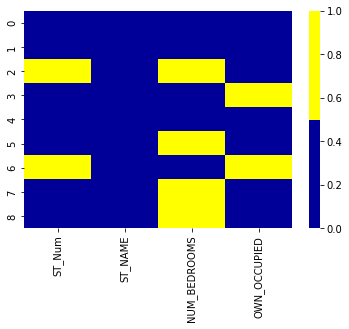

In [ ]:
#Visualize missing values using Seaborn
import seaborn as sns
cols = df.columns[:19] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [ ]:
# Option I: Encode the necessary column/variable in the df (encode categorical into numerical)
from sklearn. preprocessing import LabelEncoder, OneHotEncoder


encoders = dict()

for col_name in df.columns:
    series = df['OWN_OCCUPIED']
    label_encoder = LabelEncoder()
    df['OWN_OCCUPIED'] = pd.Series(
        label_encoder.fit_transform(series[series.notnull()]),
        index=series[series.notnull()].index
    )
    encoders['OWN_OCCUPIED'] = label_encoder

print(df)

   ST_Num     ST_NAME  NUM_BEDROOMS  OWN_OCCUPIED
0   104.0      PUTNAM           3.0           1.0
1   197.0   LEXINGTON           3.0           0.0
2     NaN   LEXINGTON           NaN           0.0
3   201.0    BERKELEY           1.0           NaN
4   203.0    BERKELEY           3.0           1.0
5   207.0    BERKELEY           NaN           1.0
6     NaN  WASHINGTON           2.0           NaN
7   213.0     TREMONT           NaN           1.0
8   215.0     TREMONT           NaN           1.0


In [ ]:
# don't run this cell if you decided on Option I
# Option II: Encode all columns / variables in the df
from sklearn. preprocessing import LabelEncoder, OneHotEncoder

encoders = dict()

for col_name in df.columns:
    series = df[col_name]
    label_encoder = LabelEncoder()
    df[col_name] = pd.Series(
        label_encoder.fit_transform(series[series.notnull()]),
        index=series[series.notnull()].index
    )
    encoders[col_name] = label_encoder

print(df)

   ST_Num  ST_NAME  NUM_BEDROOMS  OWN_OCCUPIED
0     0.0        2           2.0           1.0
1     1.0        1           2.0           0.0
2     NaN        1           NaN           0.0
3     2.0        0           0.0           NaN
4     3.0        0           2.0           1.0
5     4.0        0           NaN           1.0
6     NaN        4           1.0           NaN
7     5.0        3           NaN           1.0
8     6.0        3           NaN           1.0


**K-Nearest Neighbour (KNN) Imputation**

An alternative way to impute missing values is to predict them. Nearest neighbor imputation is widely used and proven to be an effective way of missing value imputation.

We can use KNNImputer from Scikit-learn, where missing values are imputed using the mean value from K-nearest neighbors found in the training set.

from sklearn.impute import KNNImputer <br>
KNNImputer(missing_values=np.nan, n_neighbors=5, weights='uniform', metric='nan_euclidean') <br>

KNNImputer has several parameters such as missing_values which by default set to np.nan, n_neighbors which is the selected number of neighboring samples to use for imputation by default set to 5, metric which is the distance metric for searching neighbors by default set as ‘nan-euclidean’ but can also be defined with user-defined functions.

KNNImputer can work with continuous, discrete and categorical data types but not with text data.

If you identify 3 neighbors from whom you ask for help and choose to combine the items supplied by 3 of your nearest neighbors, that is an example of imputation from 3-nearest neighbors. Similarly, missing values in datasets can be imputed with the help of values of observations from the k-Nearest Neighbours in your dataset. Neighboring points for a dataset are identified by certain distance metrics, generally euclidean distance.

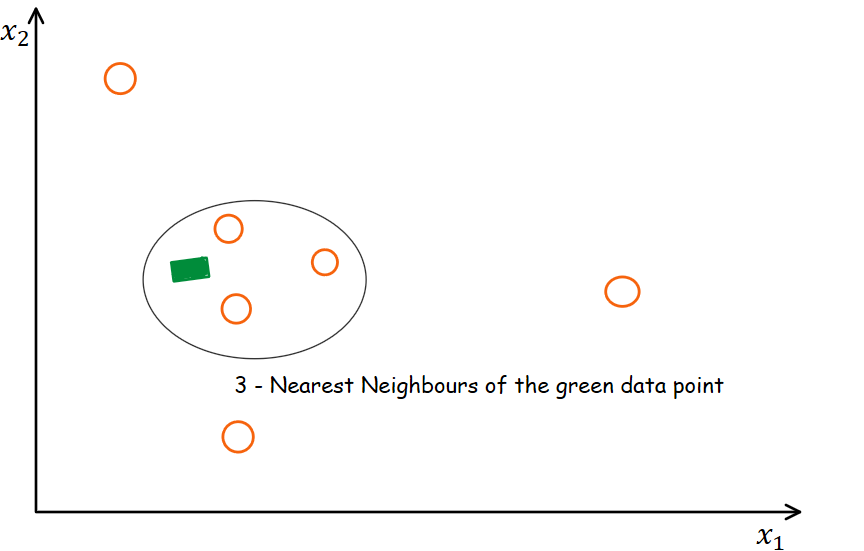

the oval area represents the neighboring points of the green squared data point. We use a measure of distance to identify the neighbors.

In [ ]:
df

,ST_Num,ST_NAME,NUM_BEDROOMS,OWN_OCCUPIED
0,104.0,PUTNAM,3.0,1.0
1,197.0,LEXINGTON,3.0,0.0
2,NaN,LEXINGTON,NaN,0.0
3,201.0,BERKELEY,1.0,NaN
4,203.0,BERKELEY,3.0,1.0
5,207.0,BERKELEY,NaN,1.0
6,NaN,WASHINGTON,2.0,NaN
7,213.0,TREMONT,NaN,1.0
8,215.0,TREMONT,NaN,1.0


In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd

# import the KNNimputer class
from sklearn.impute import KNNImputer

In [ ]:
# print the df before imputation
Before_imputation = df
Before_imputation

,ST_Num,ST_NAME,NUM_BEDROOMS,OWN_OCCUPIED
0,104.0,PUTNAM,3.0,1.0
1,197.0,LEXINGTON,3.0,0.0
2,NaN,LEXINGTON,NaN,0.0
3,201.0,BERKELEY,1.0,NaN
4,203.0,BERKELEY,3.0,1.0
5,207.0,BERKELEY,NaN,1.0
6,NaN,WASHINGTON,2.0,NaN
7,213.0,TREMONT,NaN,1.0
8,215.0,TREMONT,NaN,1.0


In [ ]:
# create an object for KNNImputer
imputer = KNNImputer(n_neighbors=4)

After_imputation = imputer.fit_transform(Before_imputation[['ST_Num','NUM_BEDROOMS','OWN_OCCUPIED']])

# print dataset after performing the operation
print("\n After performing imputation\n", After_imputation)


 After performing imputation
 [[104.     3.     1.  ]
 [197.     3.     0.  ]
 [179.25   2.5    0.  ]
 [201.     1.     0.75]
 [203.     3.     1.  ]
 [207.     2.5    1.  ]
 [176.25   2.     0.75]
 [213.     2.5    1.  ]
 [215.     2.5    1.  ]]


As you can see the output here is an array not df. we need to convert the type and save it in a file for later use.

In [ ]:
After_imputation

array([[104.  ,   3.  ,   1.  ],
       [197.  ,   3.  ,   0.  ],
       [179.25,   2.5 ,   0.  ],
       [201.  ,   1.  ,   0.75],
       [203.  ,   3.  ,   1.  ],
       [207.  ,   2.5 ,   1.  ],
       [176.25,   2.  ,   0.75],
       [213.  ,   2.5 ,   1.  ],
       [215.  ,   2.5 ,   1.  ]])

In [ ]:
# Convert np array to pandas pd
# df_imputation = pd.DataFrame (After_imputation)

df_imputation = pd.DataFrame(After_imputation,
                 columns=['ST_Num', 'NUM_BEDROOMS', 'OWN_OCCUPIED'])

In [ ]:
df_imputation

,ST_Num,NUM_BEDROOMS,OWN_OCCUPIED
0,104.00,3.0,1.00
1,197.00,3.0,0.00
2,179.25,2.5,0.00
3,201.00,1.0,0.75
4,203.00,3.0,1.00
5,207.00,2.5,1.00
6,176.25,2.0,0.75
7,213.00,2.5,1.00
8,215.00,2.5,1.00


In [ ]:
df_imputation['OWN_OCCUPIED'] = df_imputation['OWN_OCCUPIED'].astype(int)
df_imputation

,ST_Num,NUM_BEDROOMS,OWN_OCCUPIED
0,104.00,3.0,1
1,197.00,3.0,0
2,179.25,2.5,0
3,201.00,1.0,0
4,203.00,3.0,1
5,207.00,2.5,1
6,176.25,2.0,0
7,213.00,2.5,1
8,215.00,2.5,1


In [ ]:

df_imputation['NUM_BEDROOMS'] = df_imputation['NUM_BEDROOMS'].astype(int)
df_imputation

,ST_Num,NUM_BEDROOMS,OWN_OCCUPIED
0,104.00,3,1
1,197.00,3,0
2,179.25,2,0
3,201.00,1,0
4,203.00,3,1
5,207.00,2,1
6,176.25,2,0
7,213.00,2,1
8,215.00,2,1


In [ ]:
dataset = pd.concat ([df['ST_NAME'], df_imputation], axis = 'columns')
dataset

,ST_NAME,ST_Num,NUM_BEDROOMS,OWN_OCCUPIED
0,PUTNAM,104.00,3,1
1,LEXINGTON,197.00,3,0
2,LEXINGTON,179.25,2,0
3,BERKELEY,201.00,1,0
4,BERKELEY,203.00,3,1
5,BERKELEY,207.00,2,1
6,WASHINGTON,176.25,2,0
7,TREMONT,213.00,2,1
8,TREMONT,215.00,2,1


Compare with previous class <br>
from sklearn.impute import SimpleImputer

df_mode = df.copy()
mode_imputer = SimpleImputer(strategy='most_frequent')
df_mode['OWN_OCCUPIED'] = mode_imputer.fit_transform(df_mode['OWN_OCCUPIED'].values.reshape(-1,1))
df_mode
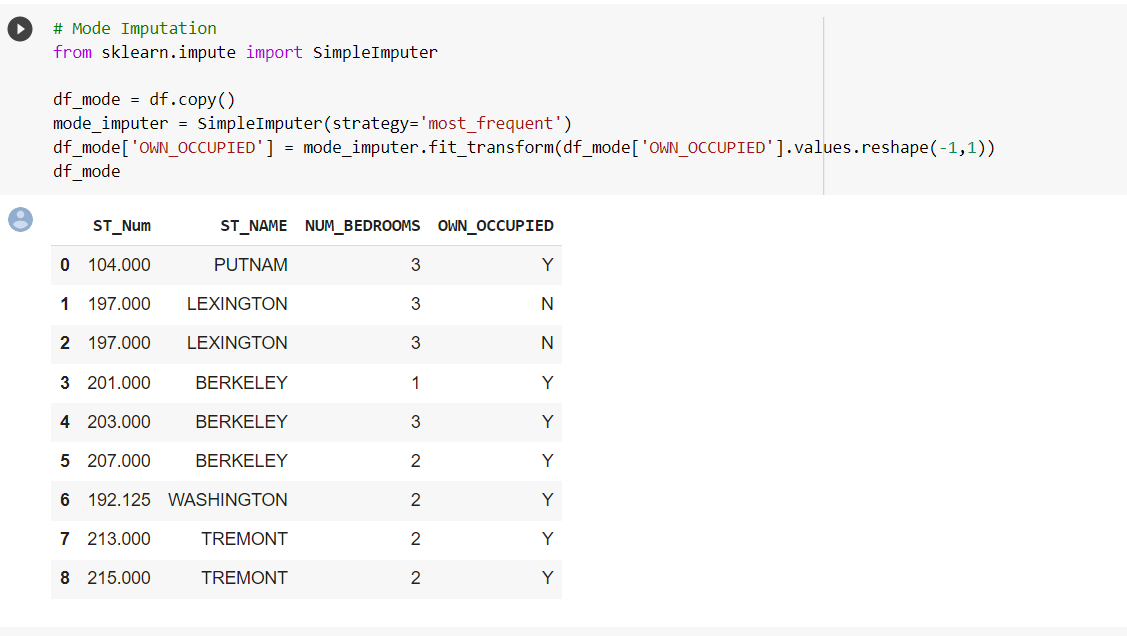

I prefer the sklearn  Simple Imputer strategy most common (mode) for dichotomous binary variables (Y/N).

In [ ]:
# save the df to excel file
dataset.to_excel("output.xlsx")

In [ ]:
# as you can see, using KNN for coding categorical binary variables, yielded the opposite to the most frequent strategy done by SimpleImputer of sklearn